In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [24]:
bdf = pd.DataFrame(data = boston.data, columns = boston.feature_names)

In [25]:
bdf['price'] = boston.target

In [26]:
bdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [113]:
feature1 = bdf['RM']
feature2 = bdf['DIS']
response = bdf['price']

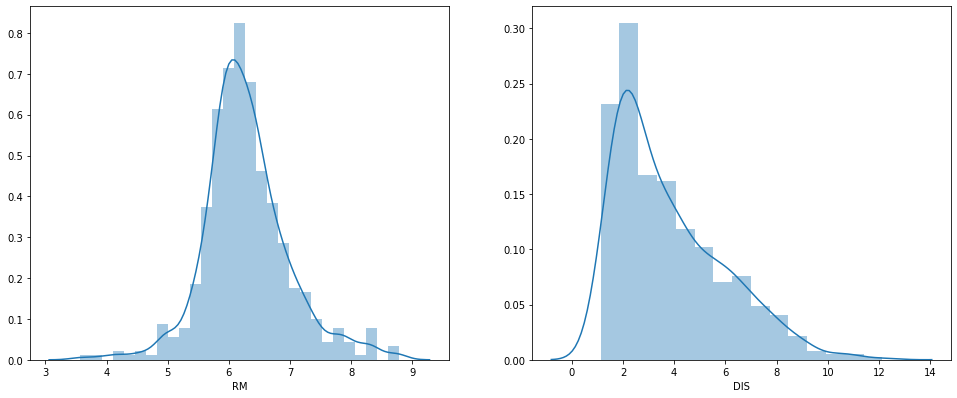

In [138]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16.5, 6.5)
sns.distplot(feature1, ax=ax[0])
sns.distplot(feature2, ax=ax[1])

In [31]:
from sklearn.linear_model import LinearRegression

In [165]:
def fit_and_plot(X, y, model):
    model.fit(X.reshape((-1,1)), y)
    y_pred = model.predict(X.reshape((-1,1)))
    score = model.score(X.reshape((-1,1)), y)
    sns.scatterplot(X, y)
    sns.lineplot(X, y_pred, color="coral")
    print('R^2 score: ', score)

## First feature

R^2 score:  0.4835254559913343


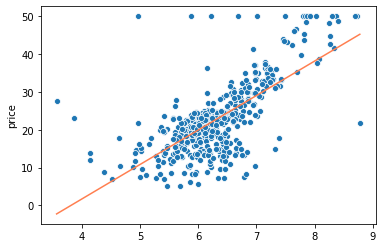

In [149]:
fit_and_plot(feature1.values, response, model = LinearRegression())

**Conclusion:** It's alright 

We can see that the relation is more linear than it is exponential, though a polynomial fit could be worth trying.

## Second feature

R^2 score:  0.06246437212178257


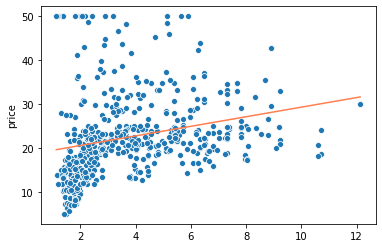

In [169]:
fit_and_plot(feature2.values, response, model = LinearRegression())

**Conclusion:** Pretty bad

The polynomial or exponential fit would probably do a far better job.

Let's try something out...

We will use 'log' and 'sqrt' of X since it seems like even a simple assumption of quadratic or exponential dependency might benefit us.

R^2 score:  0.08544845128981626


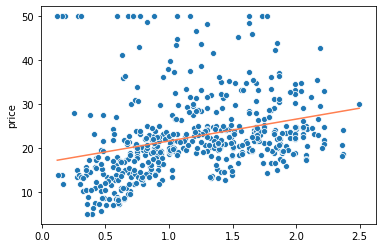

In [170]:
fit_and_plot(np.log(feature2.values), response, model = LinearRegression())

R^2 score:  0.07504647840334133


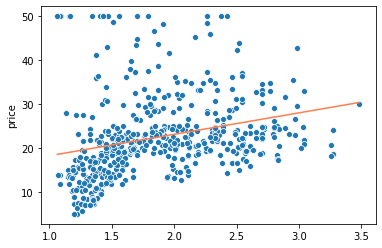

In [176]:
fit_and_plot(np.sqrt(feature2.values), response, model = LinearRegression())

I think that proves my point that in this case we could do way better, but doing so is not the point of this notebook so i will leave it right there.